In [9]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [219]:
url='https://raw.githubusercontent.com/gamzebb/group-project/refs/heads/main/merged_sentiment_copy.csv'
merged_sentiment = pd.read_csv(url)
merged_sentiment

Date  ftse_250_price  ftse_250_total_return  base_rate  CPI  \
0    01-12-89     2661.760010             803.789978  14.713333  NaN   
1    01-01-90     2591.129883             783.250000  14.630000  5.7   
2    01-02-90     2463.879883             746.010010  14.546667  5.9   
3    01-03-90     2437.370117             741.700012  14.463333  6.0   
4    01-04-90     2285.780029             701.510010  14.380000  6.4   
..        ...             ...                    ...        ...  ...   
424  01-12-24    20622.605250           18346.656780   4.666667  2.5   
425  01-01-25    20950.482850           18672.852080   4.583333  3.0   
426  01-02-25    20326.383590           18140.063380   4.500000  2.8   
427  01-03-25    19475.479520           17424.441290   4.500000  2.6   
428  01-04-25    19884.587720           17897.238770   4.500000  2.6   

     ftse_350_Price  ftse_350_Total Return (Gross, Unhedged)  price_02_Price  \
0               NaN                                      NaN             NaN   
1       1165.829956                               725.320007             NaN   
2       1121.469971                               700.580017             NaN   
3       1115.699951                               701.400024             NaN   
4       1044.619995                               660.010010             NaN   
..              ...                                      ...             ...   
424     4510.612374                              9911.349295       97.599004   
425     4760.296255                             10468.532720       97.964750   
426     4808.022992                             10614.288820       97.931114   
427     4675.031137                             10374.199300       98.206564   
428     4644.106267                             10346.175470       98.691235   

     price_02_Total Return (Gross, Unhedged)  confidence_score  \
0                                        NaN               NaN   
1                                        NaN             -19.0   
2                                        NaN             -24.0   
3                                        NaN             -35.0   
4                                        NaN             -31.0   
..                                       ...               ...   
424                                  202.318             -17.0   
425                                  203.450             -22.0   
426                                  204.230             -20.0   
427                                  204.810             -19.0   
428                                  206.139             -23.0   

     price_05_Price  price_05_Total Return (Gross, Unhedged)  price_10_Price  \
0               NaN                                      NaN             NaN   
1               NaN                                      NaN             NaN   
2               NaN                                      NaN             NaN   
3               NaN                                      NaN             NaN   
4               NaN                                      NaN             NaN   
..              ...                                      ...             ...   
424       76.436604                                  258.074       70.333738   
425       77.157249                                  260.303       70.983754   
426       77.946072                                  262.794       71.900830   
427       76.341361                                  258.271       69.708409   
428       77.899108                                  263.519       71.042948   

     price_10_Total Return (Gross, Unhedged)  unemployment_rate  \
0                                        NaN                NaN   
1                                        NaN                6.9   
2                                        NaN                6.9   
3                                        NaN                6.9   
4                                        NaN                6.9   
..                         

In [233]:
# Rename columns to more readable names
merged_sentiment = merged_sentiment.rename(columns={
    'ftse_250_price': 'FTSE 250 Price',
    'ftse_250_total_return': 'FTSE 250 Total Return',
    'CPI': 'Consumer Price Index (CPI)',
    'ftse_350_Price': 'FTSE 350 Price',
    'ftse_350_Total Return (Gross, Unhedged)': 'FTSE 350 Total Return',
    'price_02_Price': '2Y Gilt Price',
    'price_02_Total Return (Gross, Unhedged)': '2Y Gilt Total Return',
    'confidence_score': 'Confidence Score',
    'price_05_Price': '5Y Gilt Price',
    'price_05_Total Return (Gross, Unhedged)': '5Y Gilt Total Return',
    'price_10_Price': '10Y Gilt Price',
    'price_10_Total Return (Gross, Unhedged)': '10Y Gilt Total Return',
    'unemployment_rate': 'Unemployment Rate',
    'wage_growth_rate': 'Wage Growth Rate',
    'gdp_GDP': 'GDP',
    'base_rate': 'Base Rate',
    'polarity_score_finbert': 'FinBERT Sentiment Score'
})


In [257]:
merged_sentiment.columns

Index(['Date', 'FTSE 250 Price', 'FTSE 250 Total Return', 'Base Rate',
       'Consumer Price Index (CPI)', 'FTSE 350 Price', 'FTSE 350 Total Return',
       '2Y Gilt Price', '2Y Gilt Total Return', 'Confidence Score',
       '5Y Gilt Price', '5Y Gilt Total Return', '10Y Gilt Price',
       '10Y Gilt Total Return', 'Unemployment Rate', 'Wage Growth Rate', 'GDP',
       'FinBERT Sentiment Score'],
      dtype='object')

Improved heatmap saved as 'correlation_heatmap_sentiment.png'


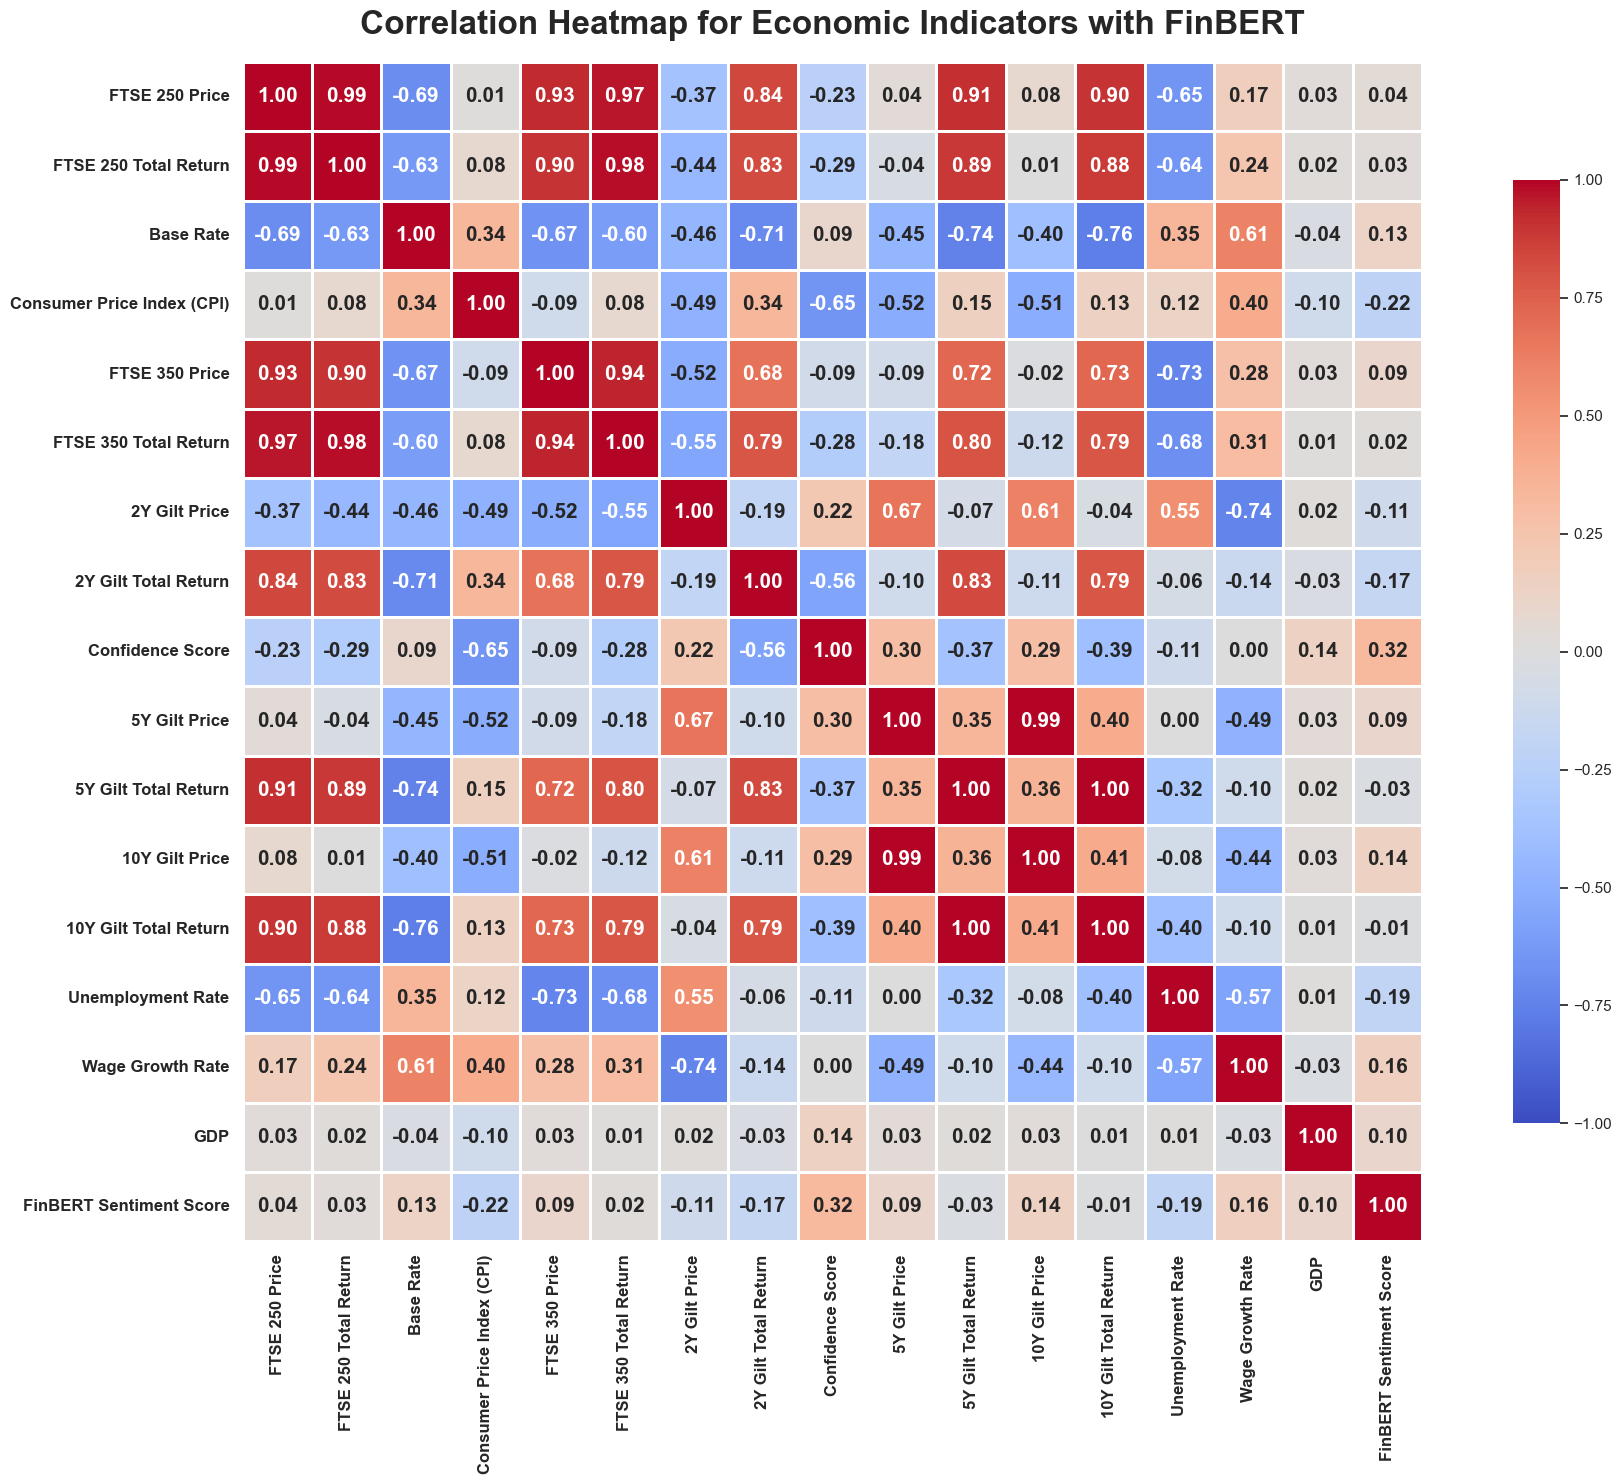

In [239]:
# Calculate the correlation matrix
correlation_matrix = merged_sentiment.select_dtypes(include='number').corr()

# Plot heatmap with improved styling
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)
plt.title('Correlation Heatmap for Economic Indicators with FinBERT', fontsize=24, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

# Save the figure
heatmap_figure_path = "correlation_heatmap_sentiment.png"
#plt.savefig(heatmap_figure_path, dpi=300, bbox_inches='tight')

print(f"Improved heatmap saved as '{heatmap_figure_path}'")
plt.show()

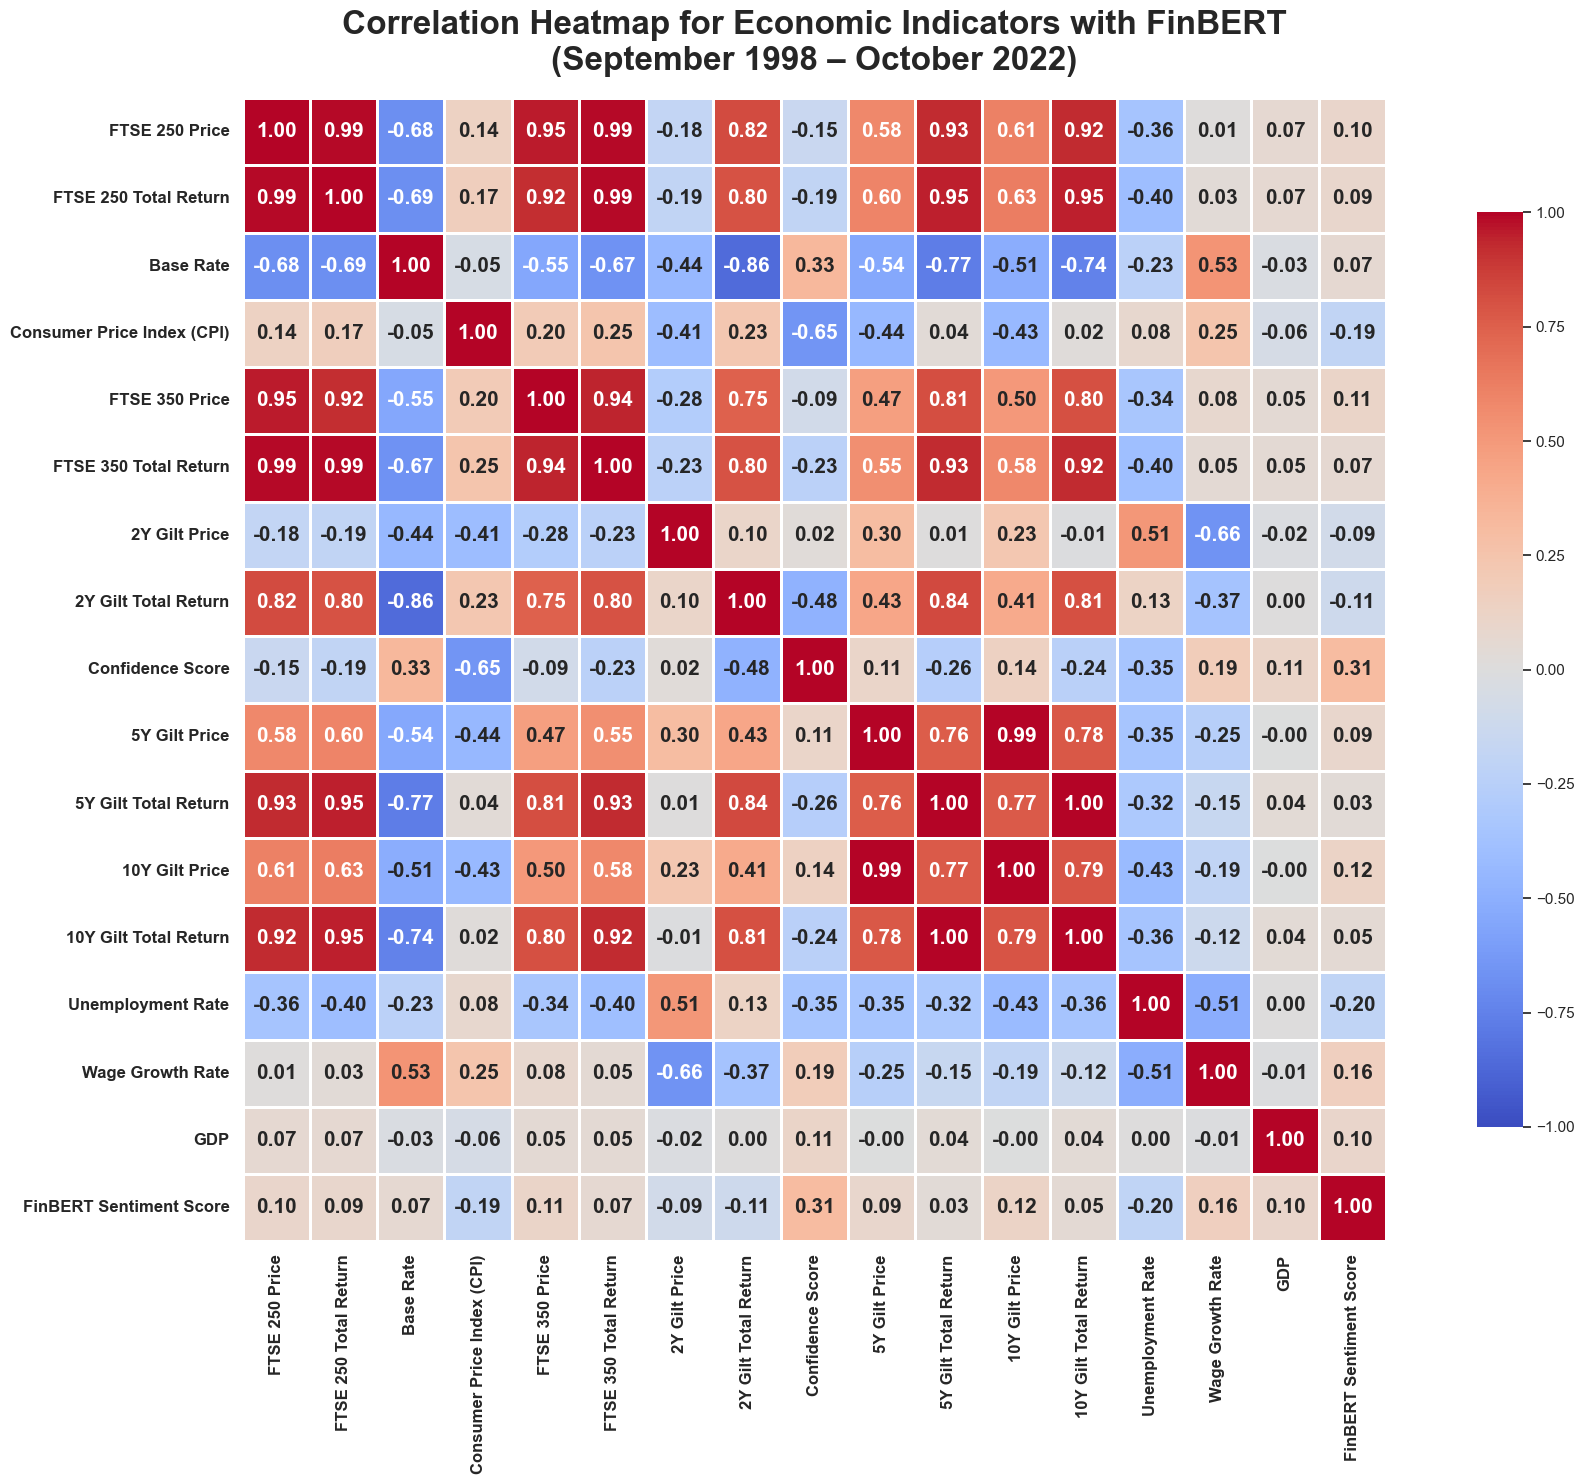

In [279]:
# Ensure 'Date' column is datetime
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'])
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 09/1998 – 10/2022
start_date = "1998-09-01"
end_date = "2022-10-01"
filtered_df = merged_sentiment[(merged_sentiment['Date'] >= start_date) & (merged_sentiment['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for Economic Indicators with FinBERT\n(September 1998 – October 2022)', 
          fontsize=24, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

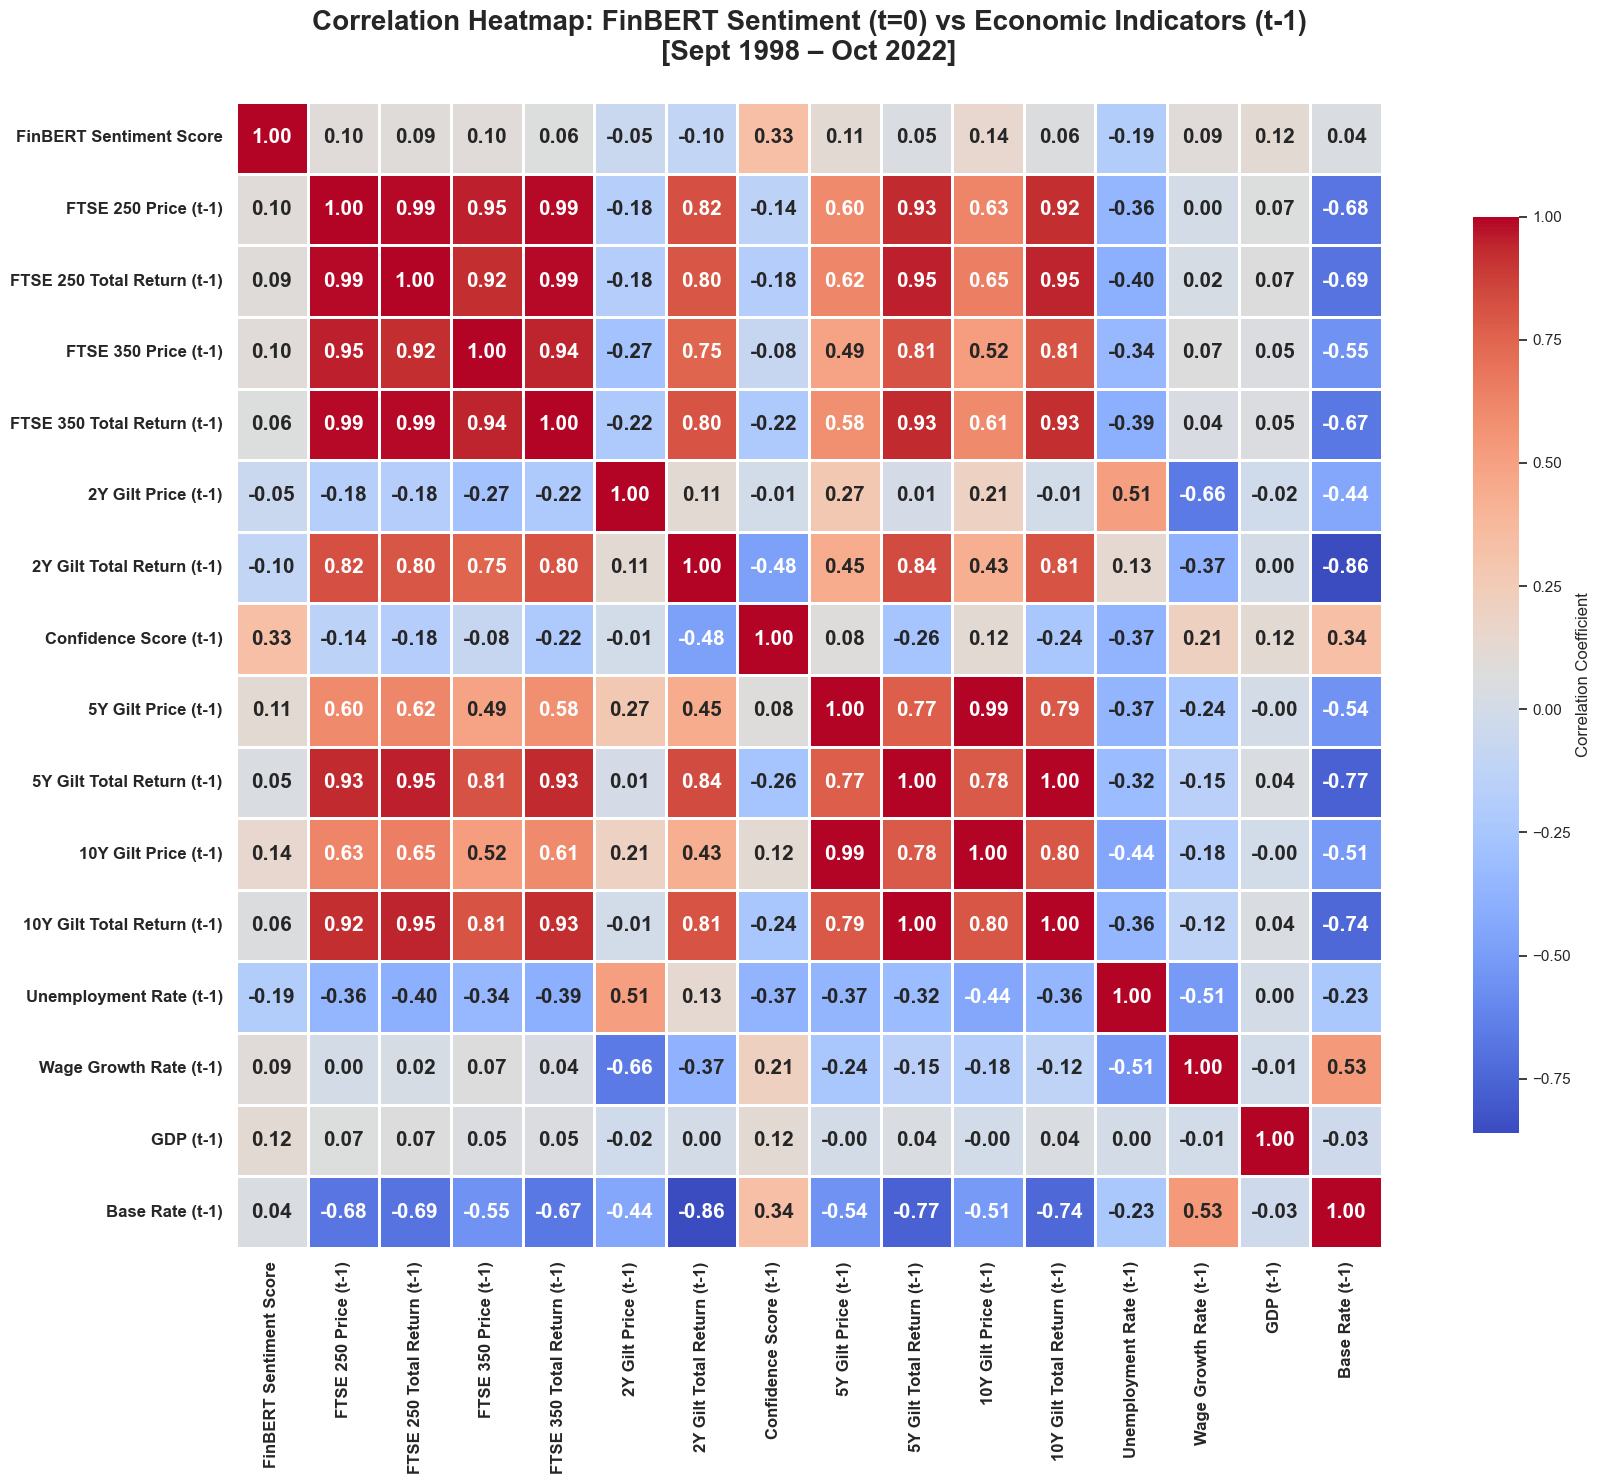

In [251]:
# Convert date and filter timeframe
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])

filtered_df = merged_sentiment[
    (merged_sentiment['Date'] >= "1998-09-01") &
    (merged_sentiment['Date'] <= "2022-10-01")
].copy()

# Build correlation dataframe
correlation_df = filtered_df[['FinBERT Sentiment Score']].copy()
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-1)"] = filtered_df[col].shift(1)

correlation_df.dropna(inplace=True)
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Heatmap: FinBERT Sentiment (t=0) vs Economic Indicators (t-1)\n[Sept 1998 – Oct 2022]",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

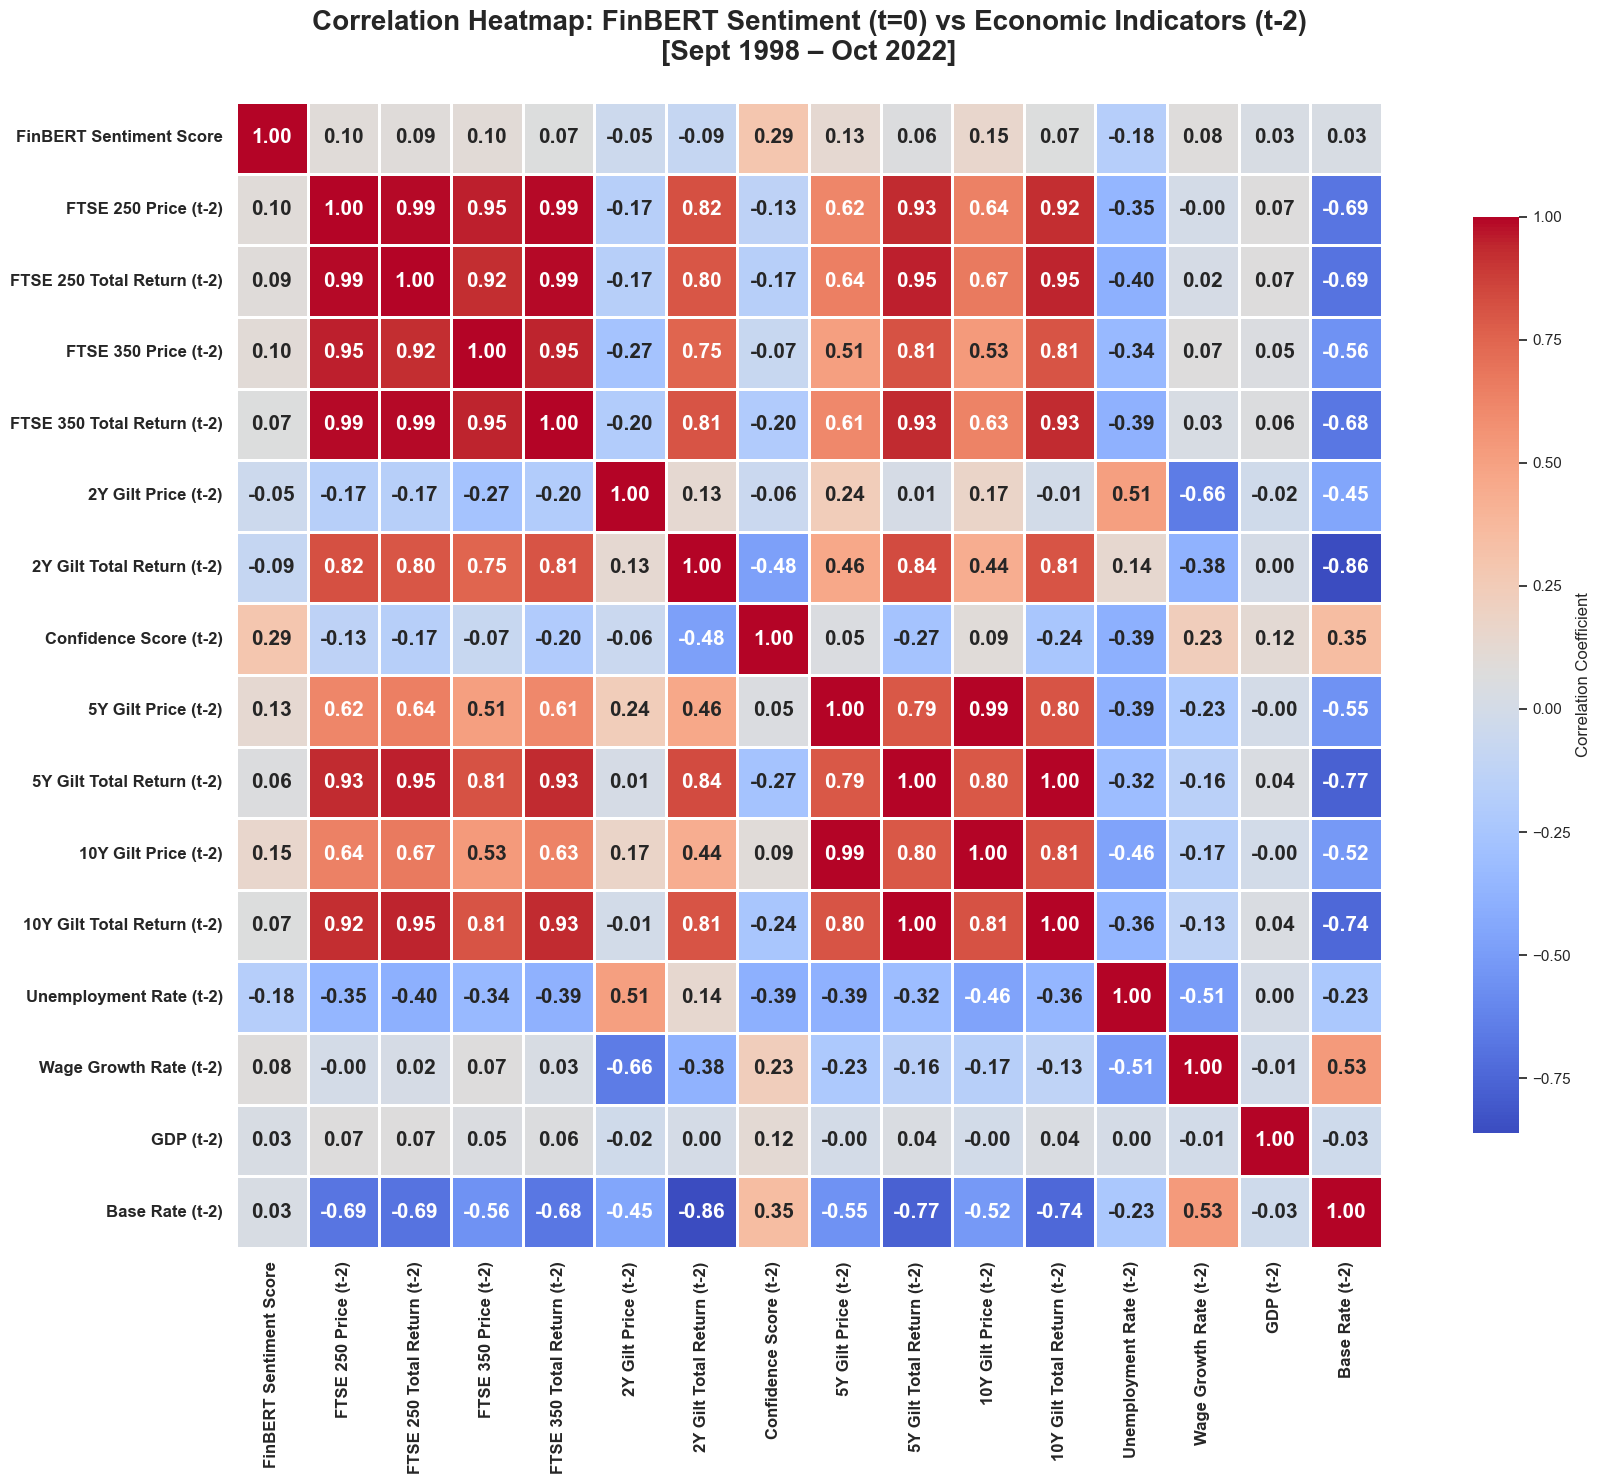

In [253]:
# Convert date and filter timeframe
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])

filtered_df = merged_sentiment[
    (merged_sentiment['Date'] >= "1998-09-01") &
    (merged_sentiment['Date'] <= "2022-10-01")
].copy()

# Build correlation dataframe
correlation_df = filtered_df[['FinBERT Sentiment Score']].copy()
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-2)"] = filtered_df[col].shift(2)  # 2-month lag

# Drop rows with missing values due to lag
correlation_df.dropna(inplace=True)

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Heatmap: FinBERT Sentiment (t=0) vs Economic Indicators (t-2)\n[Sept 1998 – Oct 2022]",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


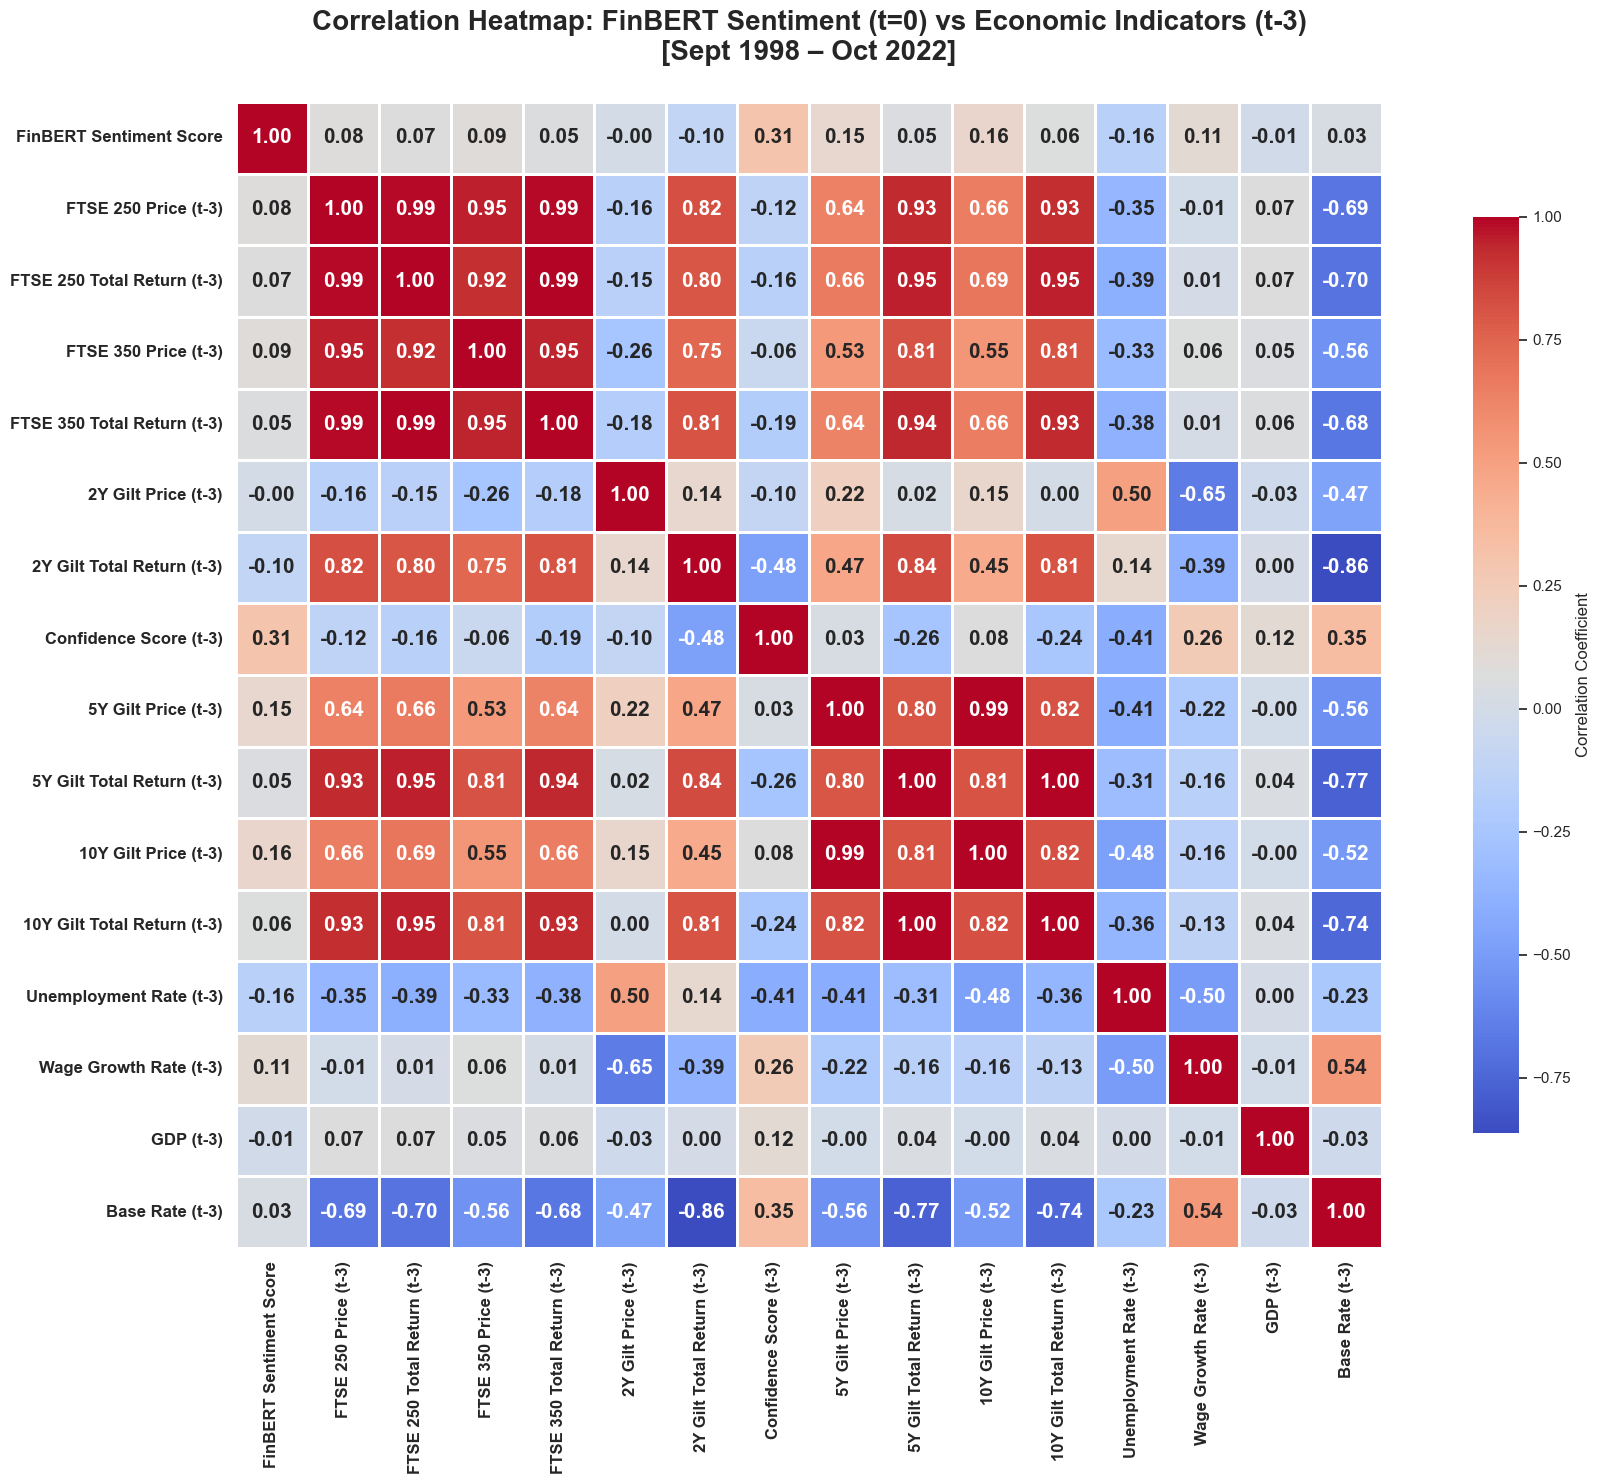

In [255]:
# Convert date and filter timeframe
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])

filtered_df = merged_sentiment[
    (merged_sentiment['Date'] >= "1998-09-01") &
    (merged_sentiment['Date'] <= "2022-10-01")
].copy()

# Build correlation dataframe
correlation_df = filtered_df[['FinBERT Sentiment Score']].copy()
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-3)"] = filtered_df[col].shift(3)  # 3-month lag

# Drop rows with missing values due to lag
correlation_df.dropna(inplace=True)

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Heatmap: FinBERT Sentiment (t=0) vs Economic Indicators (t-3)\n[Sept 1998 – Oct 2022]",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


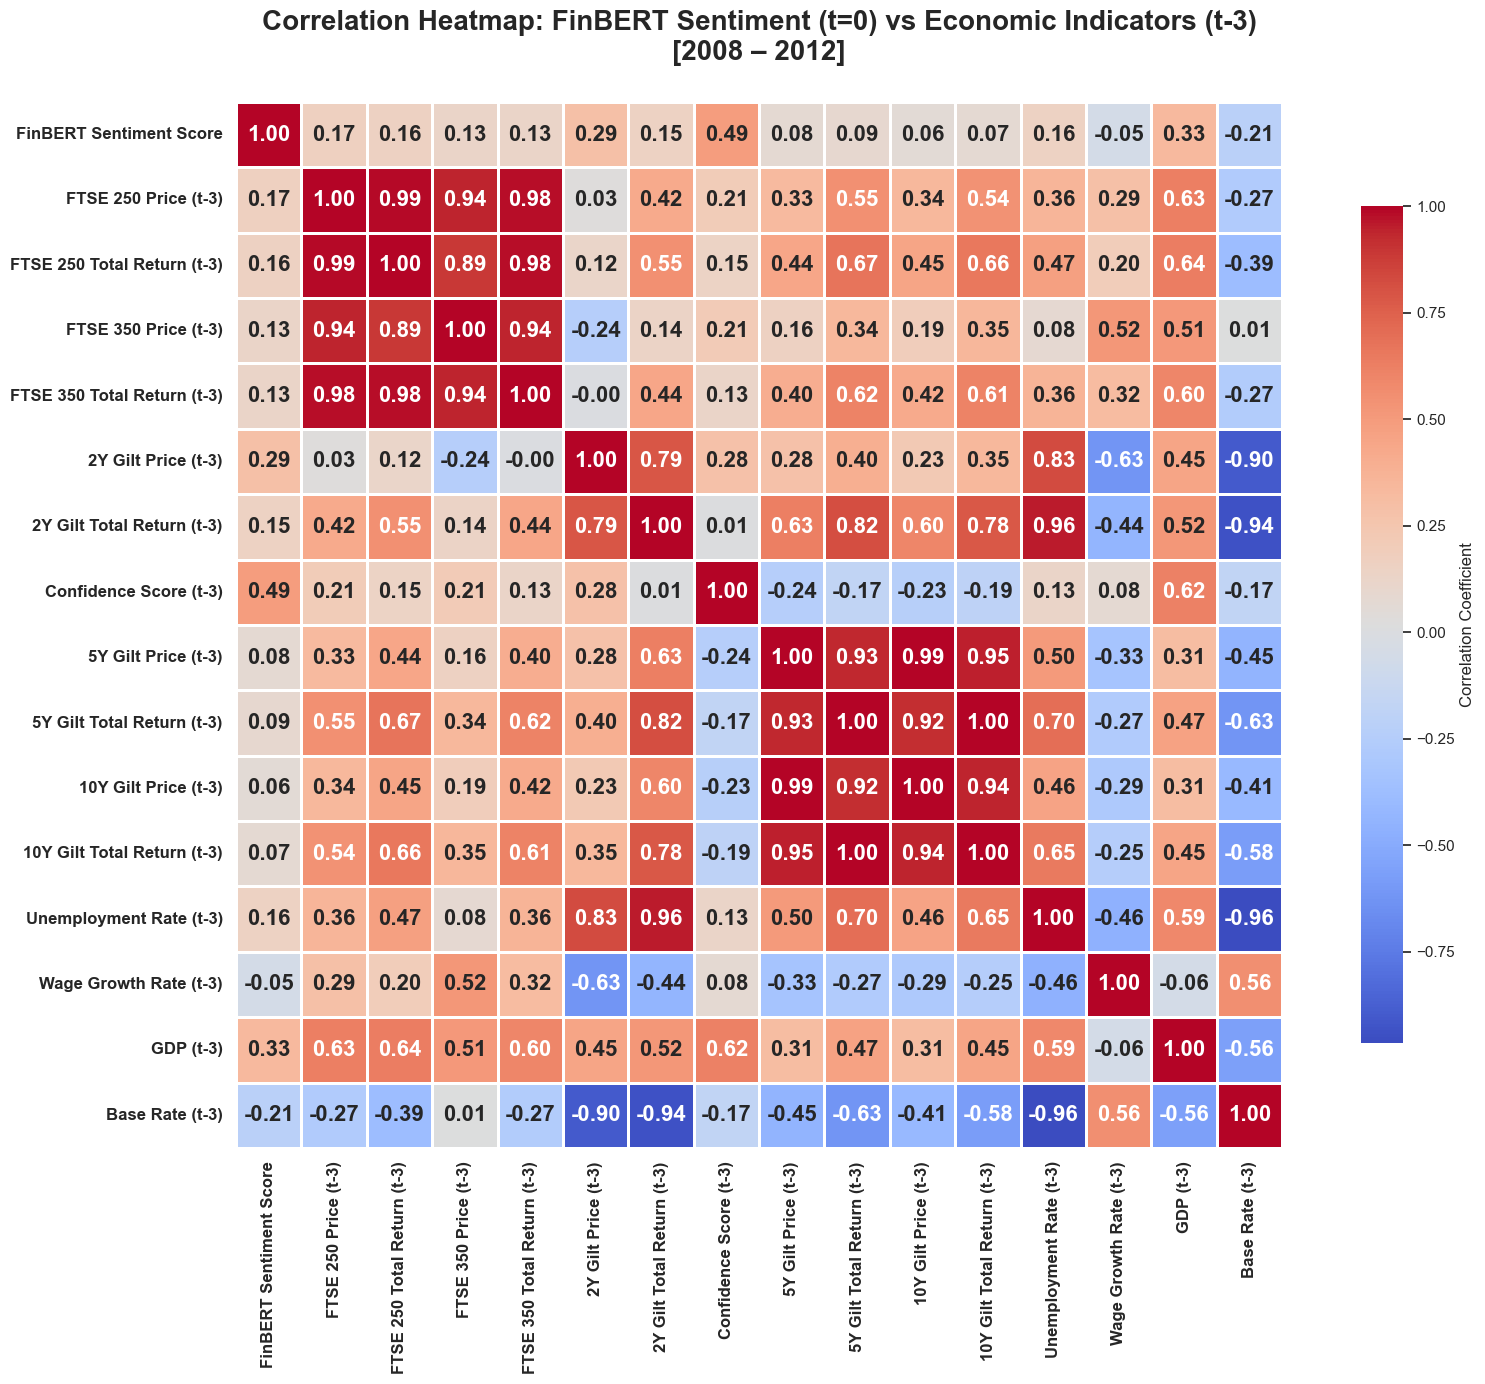

In [273]:
# Convert and filter dates
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])

# Filter timeframe: 2008–2012
filtered_df = merged_sentiment[
    (merged_sentiment['Date'] >= "2008-01-01") &
    (merged_sentiment['Date'] <= "2012-12-31")
].copy()

# Build correlation dataframe with 3-month lag
correlation_df = filtered_df[['FinBERT Sentiment Score']].copy()
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-3)"] = filtered_df[col].shift(3)

# Drop missing values from lag
correlation_df.dropna(inplace=True)

# Plot correlation heatmap
plt.figure(figsize=(18, 14))
sns.set(style="white")
sns.heatmap(
    correlation_df.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 16, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

plt.title("Correlation Heatmap: FinBERT Sentiment (t=0) vs Economic Indicators (t-3)\n[2008 – 2012]",
          fontsize=20, fontweight='bold', pad=30)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("finbert_heatmap_2008_2012.png", dpi=300)
plt.show()

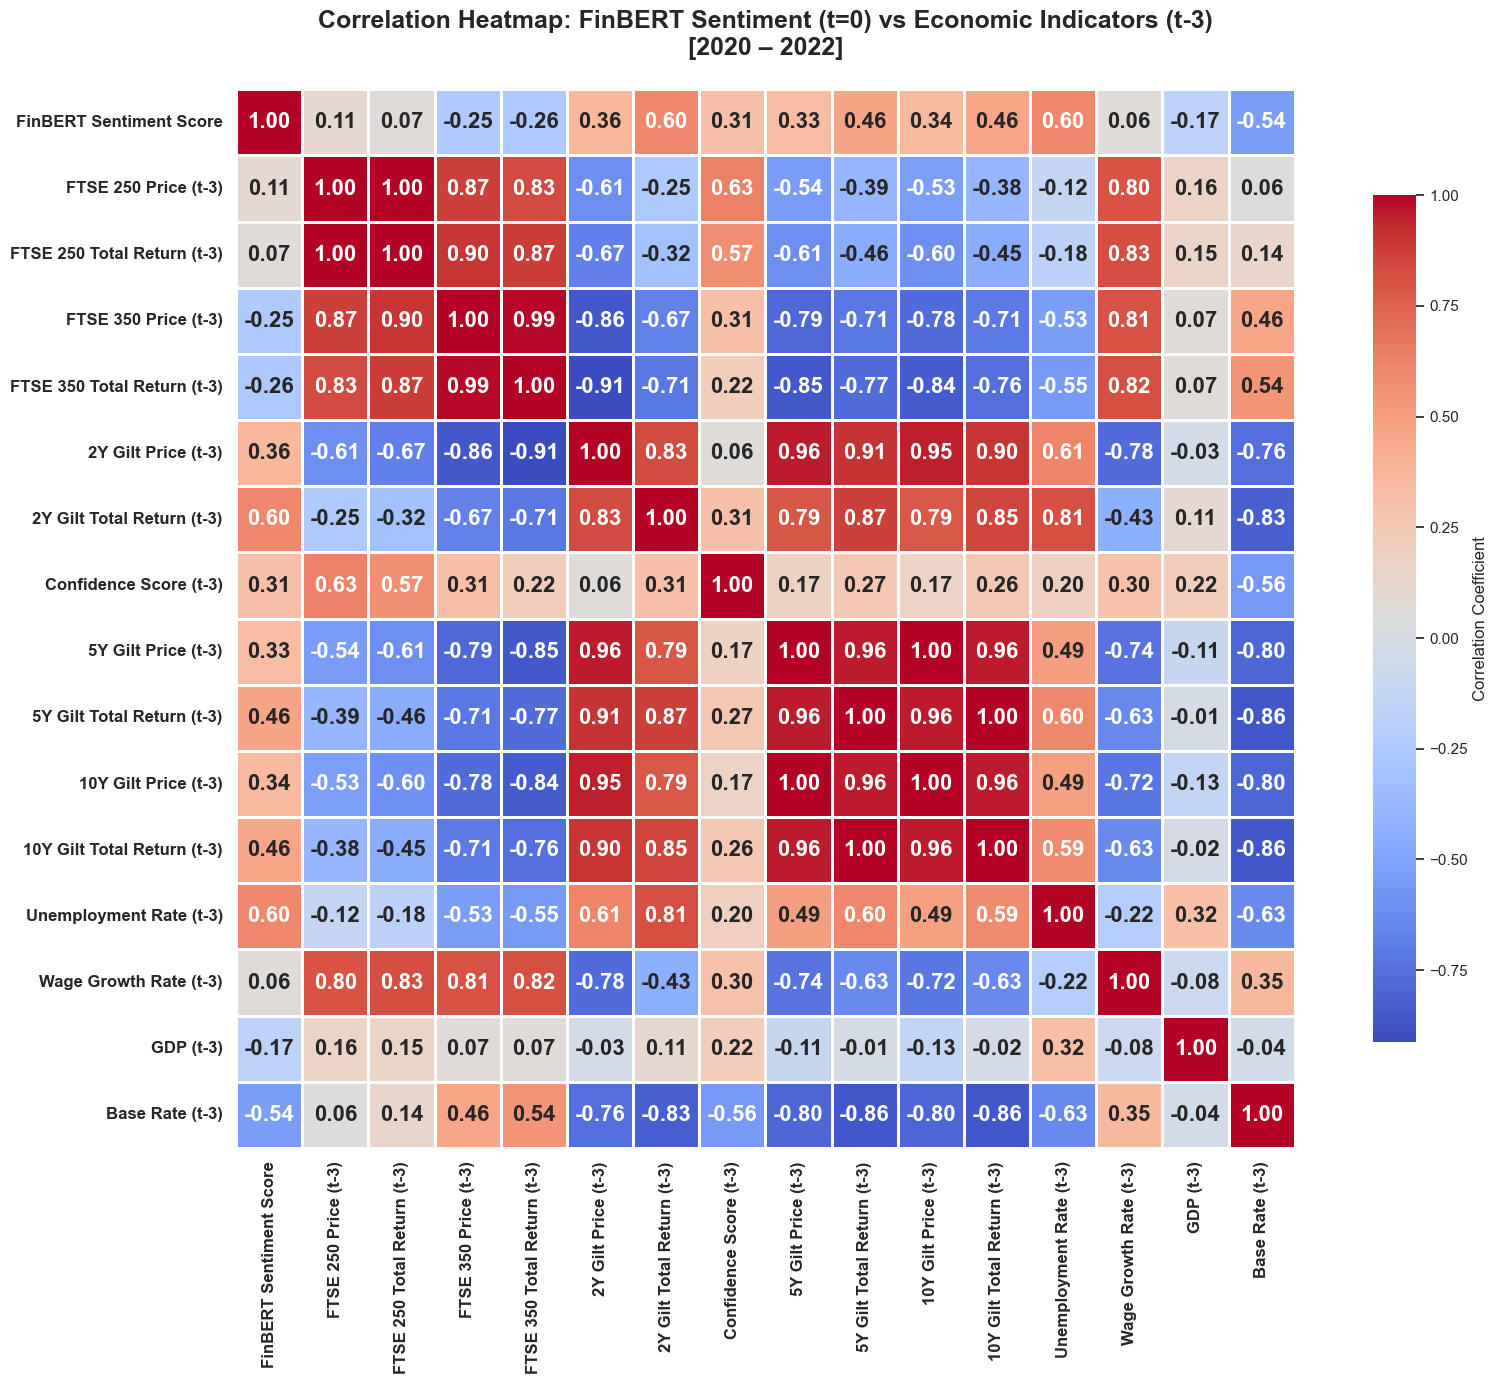

In [275]:
# Convert and filter dates
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])

# Filter timeframe: 2020–2022
filtered_df = merged_sentiment[
    (merged_sentiment['Date'] >= "2020-01-01") &
    (merged_sentiment['Date'] <= "2022-12-31")
].copy()

# Build correlation dataframe with 3-month lag
correlation_df = filtered_df[['FinBERT Sentiment Score']].copy()
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-3)"] = filtered_df[col].shift(3)

correlation_df.dropna(inplace=True)

# Plot correlation heatmap
plt.figure(figsize=(18, 14))
sns.set(style="white")
sns.heatmap(
    correlation_df.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 16, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

plt.title("Correlation Heatmap: FinBERT Sentiment (t=0) vs Economic Indicators (t-3)\n[2020 – 2022]",
          fontsize=18, fontweight='bold', pad=25)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("finbert_heatmap_2020_2022.png", dpi=300)
plt.show()

In [63]:
merged_sentiment.columns

Index(['Date', 'ftse_250_price', 'ftse_250_total_return', 'base_rate', 'CPI',
       'ftse_350_Price', 'ftse_350_Total Return (Gross, Unhedged)',
       'price_02_Price', 'price_02_Total Return (Gross, Unhedged)',
       'confidence_score', 'price_05_Price',
       'price_05_Total Return (Gross, Unhedged)', 'price_10_Price',
       'price_10_Total Return (Gross, Unhedged)', 'unemployment_rate',
       'wage_growth_rate', 'gdp_GDP', 'polarity_score_finbert'],
      dtype='object')

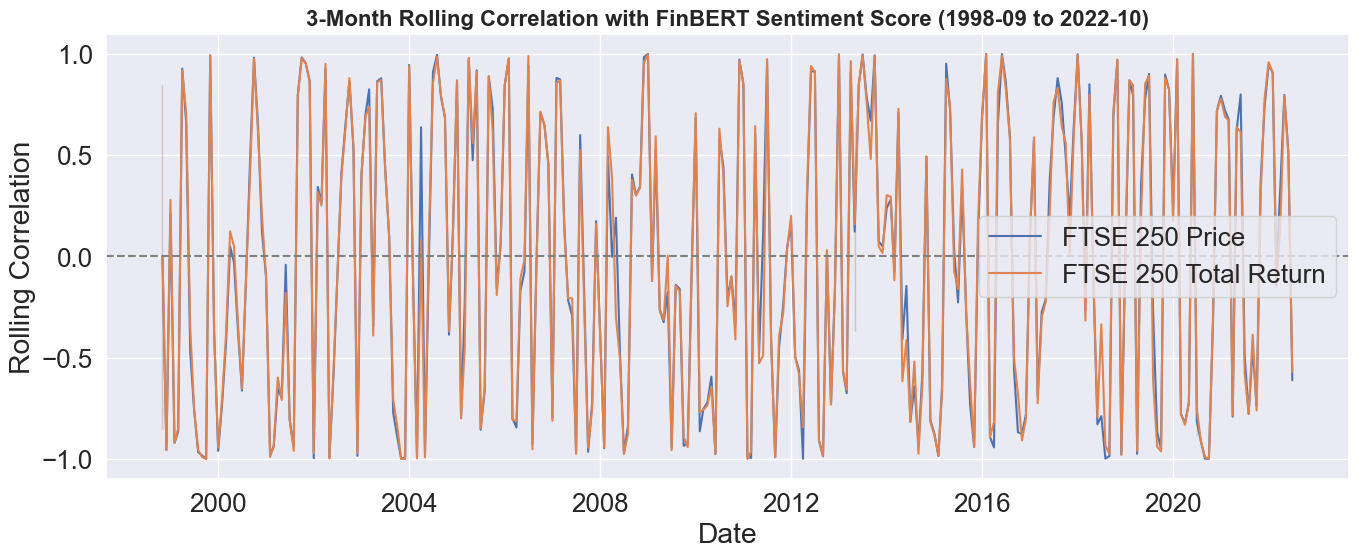

In [155]:
# Clean and filter data
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])
merged_sentiment = merged_sentiment.set_index('Date')
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# select only the relevant columns and interpolate 
subset = merged_sentiment[['ftse_250_price', 'ftse_250_total_return', 'polarity_score_finbert']].copy()
subset.interpolate(method='linear', inplace=True)

# Calculate rolling correlation (3 months) with sentiment
rolling_corr_df = subset.rolling(window=3).corr().reset_index()

#Step 4: Filter to show only correlations with the sentiment score 
rolling_corr_df = rolling_corr_df[rolling_corr_df['level_1'] == 'polarity_score_finbert']
rolling_corr_df.rename(columns={'level_0': 'Date', 'level_1': 'Reference'}, inplace=True)

#Step 5: Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=rolling_corr_df, x='Date', y='ftse_250_price', label='FTSE 250 Price')
sns.lineplot(data=rolling_corr_df, x='Date', y='ftse_250_total_return', label='FTSE 250 Total Return')
plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation with FinBERT Sentiment Score (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.ylabel('Rolling Correlation')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\924923854.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')


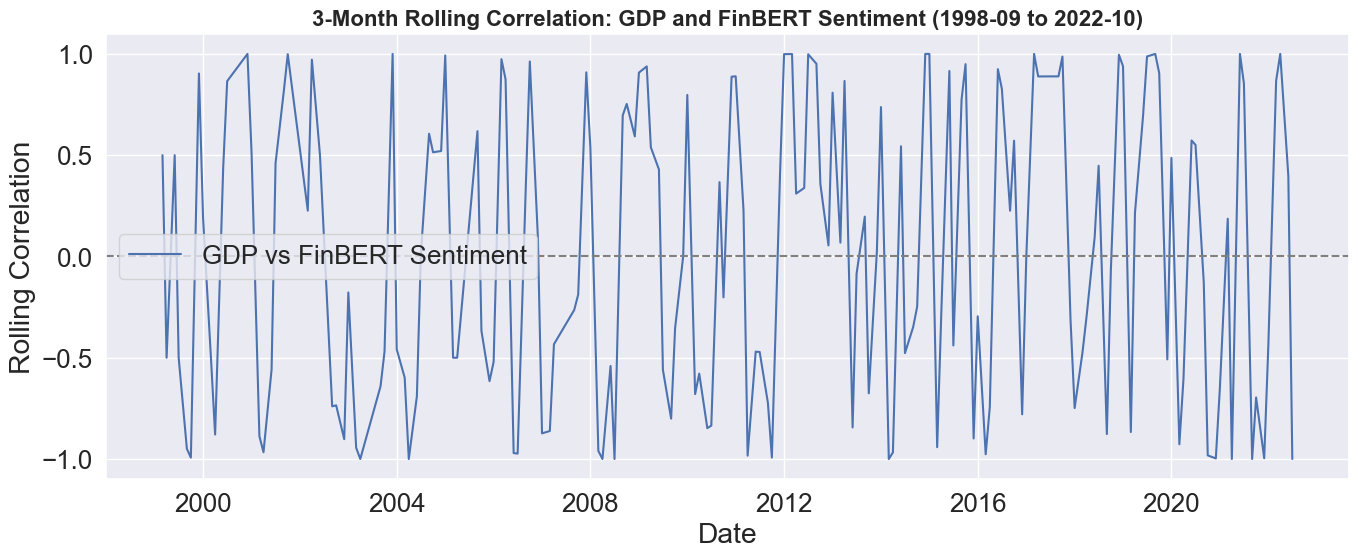

In [161]:
# Ensure Date is datetime and filter the timeframe 
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])
merged_sentiment = merged_sentiment.set_index('Date')
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# Select GDP and sentiment columns 
gdp_df = merged_sentiment[['gdp_GDP', 'polarity_score_finbert']].copy()

# Interpolate missing values for both columns
gdp_df.interpolate(method='linear', inplace=True)

# Rolling correlation 
rolling_corr_gdp = gdp_df.rolling(window=3).corr().reset_index()

# Filter to only keep correlation of gdp_GDP with sentiment
rolling_corr_gdp = rolling_corr_gdp[rolling_corr_gdp['level_1'] == 'polarity_score_finbert']
rolling_corr_gdp.rename(columns={'level_0': 'Date'}, inplace=True)

#  Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=rolling_corr_gdp, x='Date', y='gdp_GDP', label='GDP vs FinBERT Sentiment')
plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: GDP and FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\2038035528.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\2038035528.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


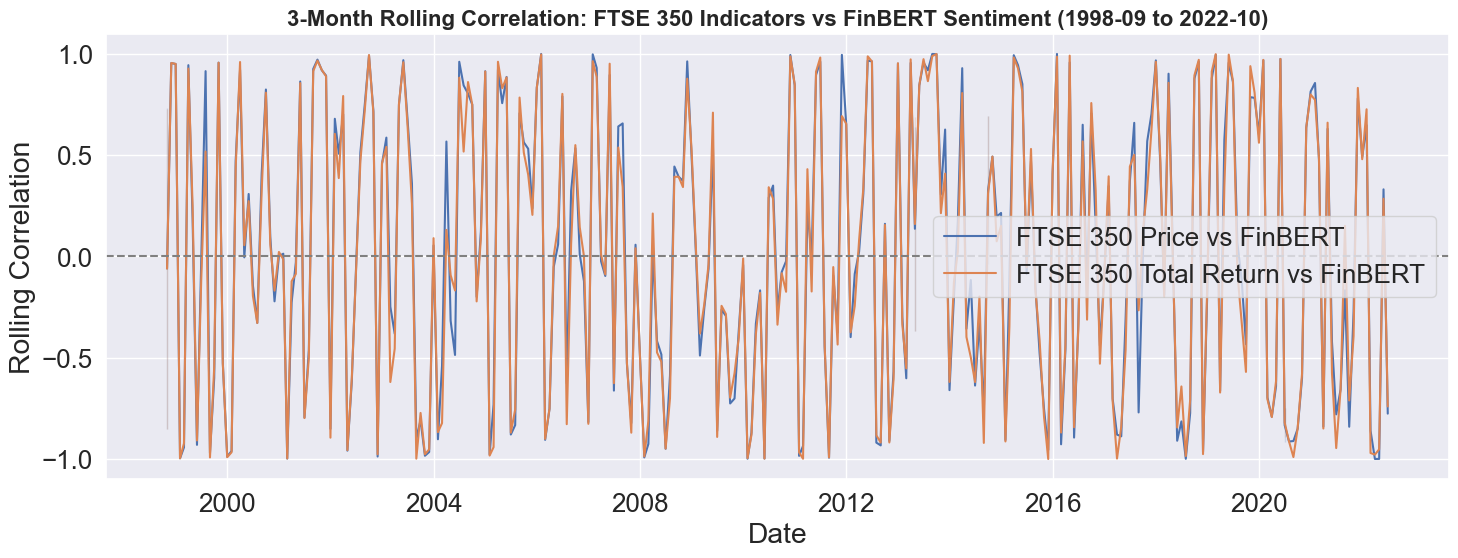

In [165]:
# Prepare the data
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])
merged_sentiment = merged_sentiment.set_index('Date')
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# Select relevant columns 
ftse_350_df = merged_sentiment[['ftse_350_Price', 'ftse_350_Total Return (Gross, Unhedged)', 'polarity_score_finbert']].copy()
ftse_350_df.interpolate(method='linear', inplace=True)

# Compute 3-month rolling correlations 
rolling_corr = ftse_350_df.rolling(window=3).corr().reset_index()

# Filter only correlations with sentiment 
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# Plot the correlations 
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='ftse_350_Price', label='FTSE 350 Price vs FinBERT')
sns.lineplot(data=filtered_corr, x='Date', y='ftse_350_Total Return (Gross, Unhedged)', label='FTSE 350 Total Return vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: FTSE 350 Indicators vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\2787902321.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\2787902321.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


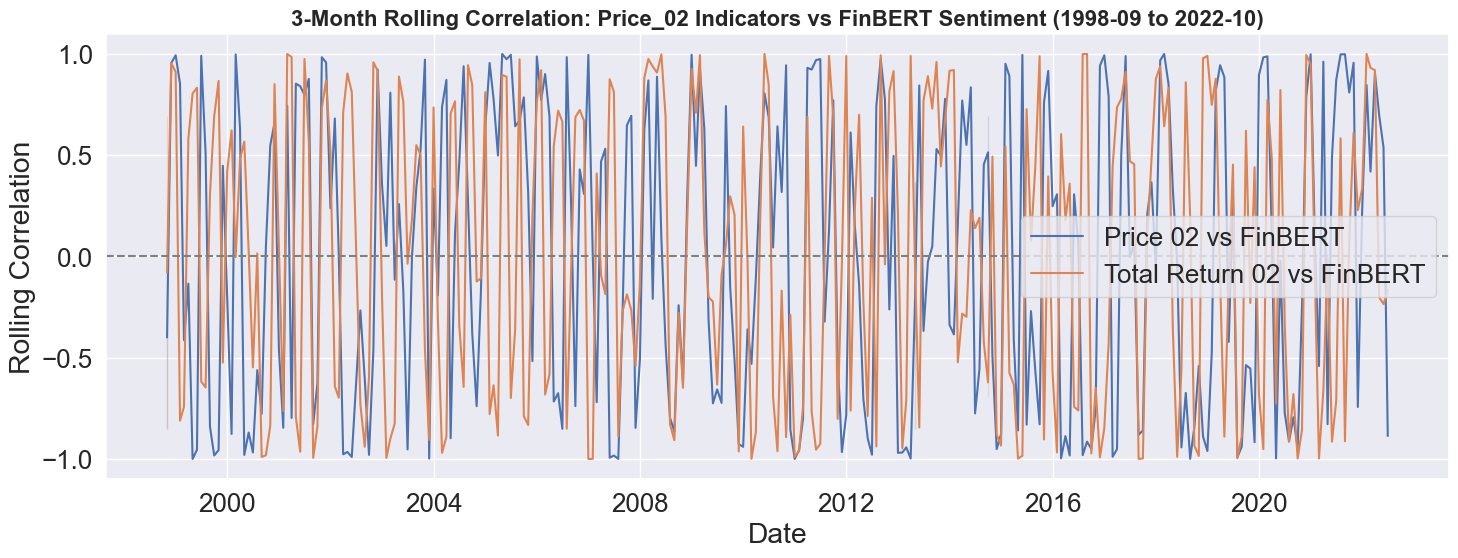

In [169]:
# Prepare data 
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# Select relevant columns
price_02_df = merged_sentiment[['price_02_Price', 'price_02_Total Return (Gross, Unhedged)', 'polarity_score_finbert']].copy()
price_02_df.interpolate(method='linear', inplace=True)

# -Rolling correlation with sentiment 
rolling_corr = price_02_df.rolling(window=3).corr().reset_index()

# Filter only correlations with sentiment 
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# Plot 
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='price_02_Price', label='Price 02 vs FinBERT')
sns.lineplot(data=filtered_corr, x='Date', y='price_02_Total Return (Gross, Unhedged)', label='Total Return 02 vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Price_02 Indicators vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\3864677196.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\3864677196.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


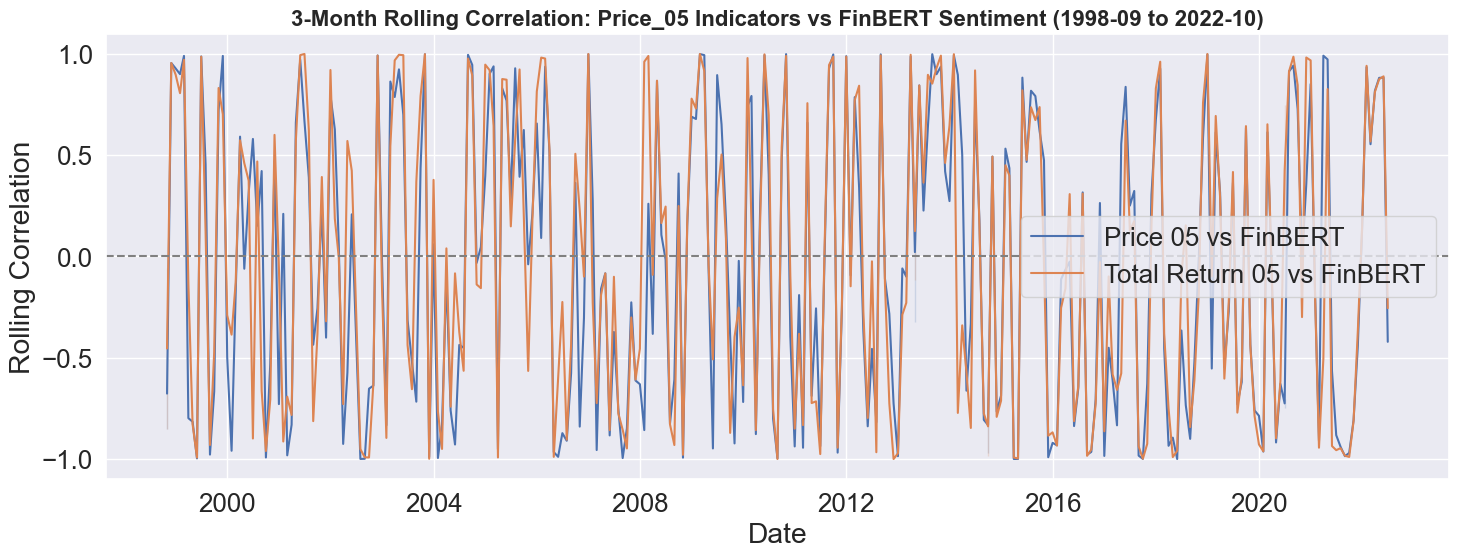

In [173]:
# Prepare data 
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

#Select relevant columns 
price_05_df = merged_sentiment[['price_05_Price', 'price_05_Total Return (Gross, Unhedged)', 'polarity_score_finbert']].copy()
price_05_df.interpolate(method='linear', inplace=True)

# Rolling correlation with sentiment 
rolling_corr = price_05_df.rolling(window=3).corr().reset_index()

# Filter only correlations with sentiment 
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# Plot 
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='price_05_Price', label='Price 05 vs FinBERT')
sns.lineplot(data=filtered_corr, x='Date', y='price_05_Total Return (Gross, Unhedged)', label='Total Return 05 vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Price_05 Indicators vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\1455938742.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\1455938742.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


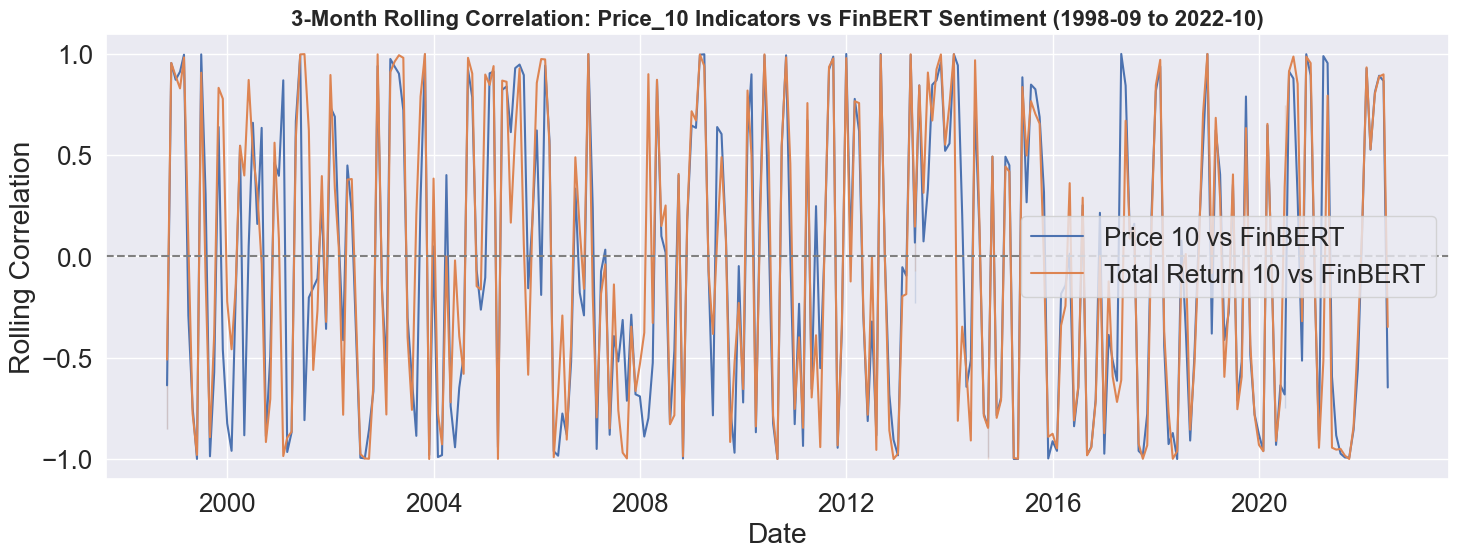

In [183]:
# Prepare data 
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# Select relevant columns 
price_10_df = merged_sentiment[['price_10_Price', 'price_10_Total Return (Gross, Unhedged)', 'polarity_score_finbert']].copy()
price_10_df.interpolate(method='linear', inplace=True)

# Rolling correlation with sentiment 
rolling_corr = price_10_df.rolling(window=3).corr().reset_index()

# Filter only correlations with sentiment 
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='price_10_Price', label='Price 10 vs FinBERT')
sns.lineplot(data=filtered_corr, x='Date', y='price_10_Total Return (Gross, Unhedged)', label='Total Return 10 vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Price_10 Indicators vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\417286023.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\417286023.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


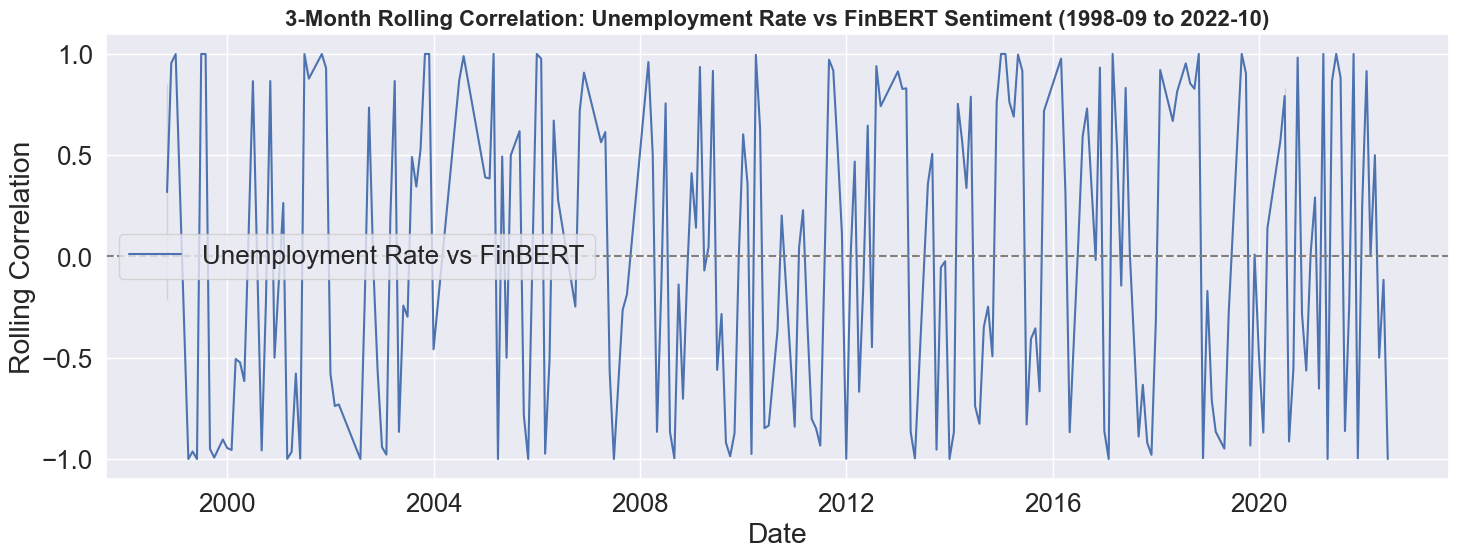

In [187]:
# Prepare data 
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

#Select relevant columns
unemployment_df = merged_sentiment[['unemployment_rate', 'polarity_score_finbert']].copy()
unemployment_df.interpolate(method='linear', inplace=True)

#Rolling correlation 
rolling_corr = unemployment_df.rolling(window=3).corr().reset_index()

# Filter only correlation with sentiment 
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

#Plot 
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='unemployment_rate', label='Unemployment Rate vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Unemployment Rate vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\3955648482.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\3955648482.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


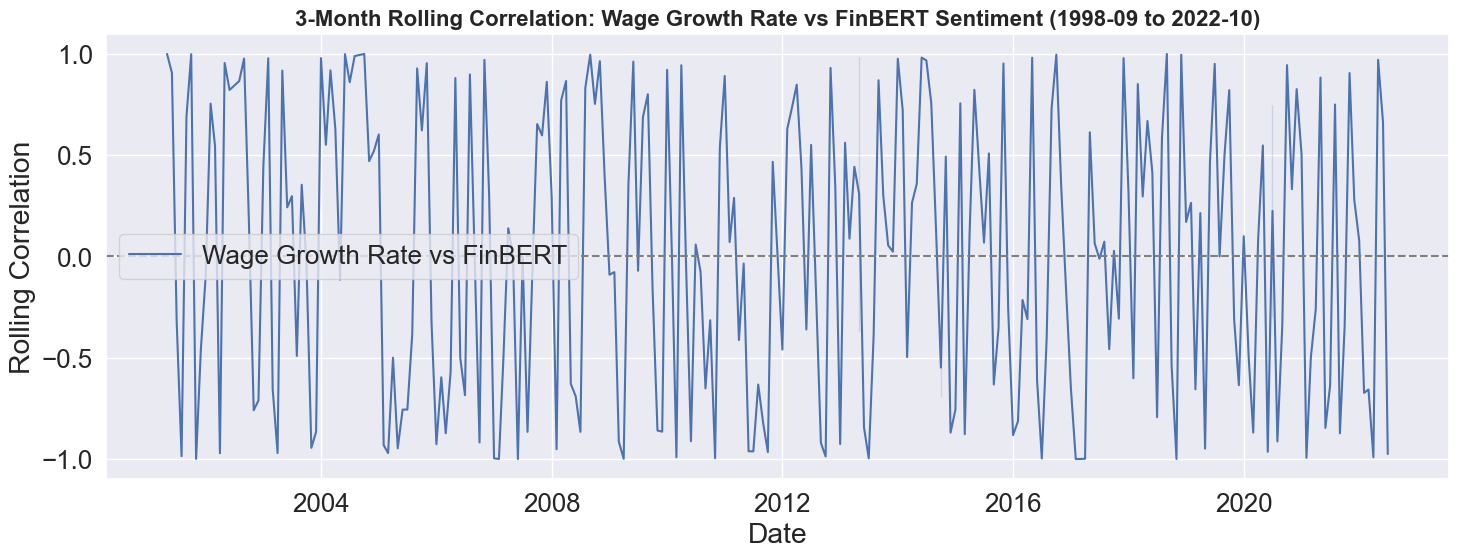

In [191]:
# Ensure datetime and set index 
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)

# Filter date range 
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# Select relevant columns 
wage_df = merged_sentiment[['wage_growth_rate', 'polarity_score_finbert']].copy()
wage_df.interpolate(method='linear', inplace=True)

# Calculate rolling correlation 
rolling_corr = wage_df.rolling(window=3).corr().reset_index()

# Filter for correlation with sentiment 
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)
#Plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='wage_growth_rate', label='Wage Growth Rate vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Wage Growth Rate vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\2888654650.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\2888654650.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


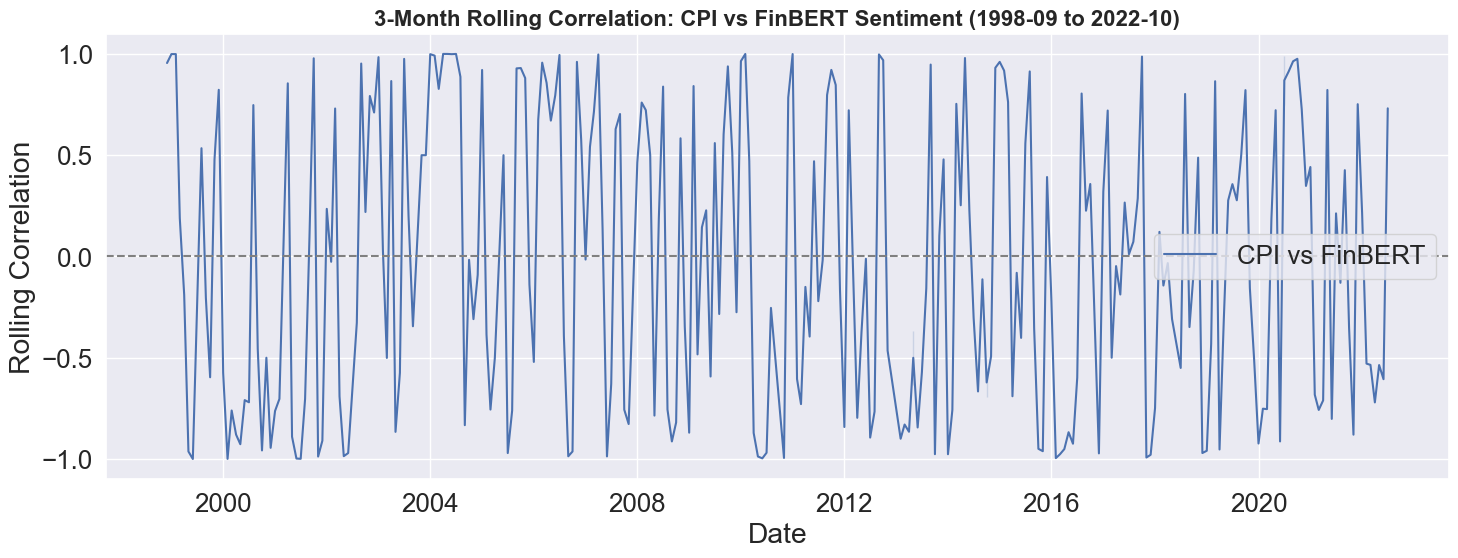

In [195]:
# Ensure datetime format and set index 
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)

# Filter to valid date range 
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# Select relevant columns and interpolate missing values 
cpi_df = merged_sentiment[['CPI', 'polarity_score_finbert']].copy()
cpi_df.interpolate(method='linear', inplace=True)

# Calculate rolling correlation 
rolling_corr = cpi_df.rolling(window=3).corr().reset_index()

# Filter for CPI's correlation with FinBERT 
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# Plot 
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='CPI', label='CPI vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: CPI vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\1597751201.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\1597751201.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


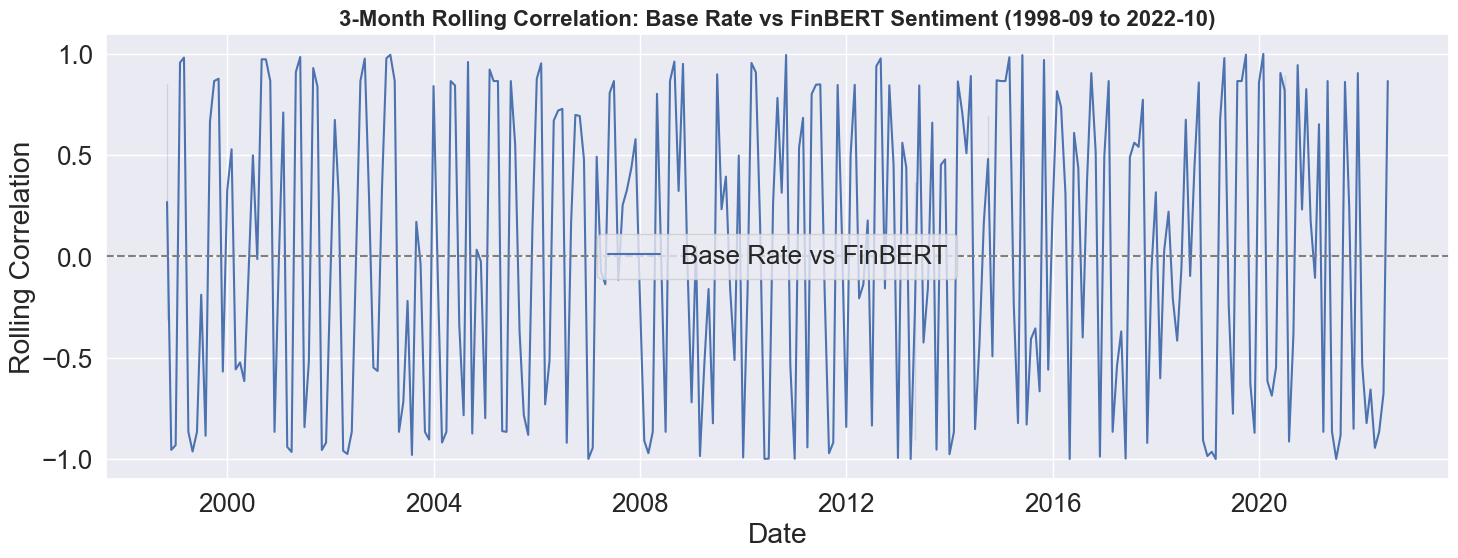

In [199]:
# Prepare datetime and set index 
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)

# Limit to date range of interest 
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

#Select relevant columns 
base_df = merged_sentiment[['base_rate', 'polarity_score_finbert']].copy()

# Handle missing data 
base_df.interpolate(method='linear', inplace=True)

# Calculate rolling correlation 
rolling_corr = base_df.rolling(window=3).corr().reset_index()

# Filter for correlation between base_rate and finbert sentiment ---
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='base_rate', label='Base Rate vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Base Rate vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()